# Matplotlib and Pandas (Part 2)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load the drinks dataset
url = 'https://raw.githubusercontent.com/geekcourses/JupyterNotebooksExamples/master/datasets/various/drinks.csv'
df = pd.read_csv(url)
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


## Matplotlib Colormaps

 Colormaps are useful for representing data using colors that vary smoothly across a range, making it easier to interpret and analyze data visually. 
 
 Matplotlib provides a variety of colormaps that can be applied to plots created using pandas.

In [6]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

### Scatter plot with colormap

In next example we will print a scaterplot to compare 'beer_servings' vs 'wine_servings'.

We will pass next parameters:

`s=df['total_litres_of_pure_alcohol']*10` : to specify the size of the markers (points) in the scatter plot, based on the values in the 'total_litres_of_pure_alcohol' column, multiplied by 10 for better visualization.

`c='total_litres_of_pure_alcohol'` : to specifies the color of the markers based on the values in the 'total_litres_of_pure_alcohol' column. Different values of 'total_litres_of_pure_alcohol' will be represented by different colors according to the chosen colormap.

`colormap='plasma'`: to specify the colormap to use for coloring the markers. Colormaps provide a smooth transition of colors across a range of values, making it easier to interpret data visually. Here, 'plasma' is chosen, which transitions from purple to yellow.

`alpha=0.8` : to set the transparency of the markers. A value of 0.8 means the markers are mostly opaque, allowing some transparency to see overlapping markers.

`colorbar=True`: to add a colorbar to the plot, which provides a scale for interpreting the colors used in the scatter plot. It shows the range of values mapped to colors in the colormap ('plasma' in this case), with a label indicating what the color represents ('Total Litres of Pure Alcohol').

<Figure size 1000x600 with 0 Axes>

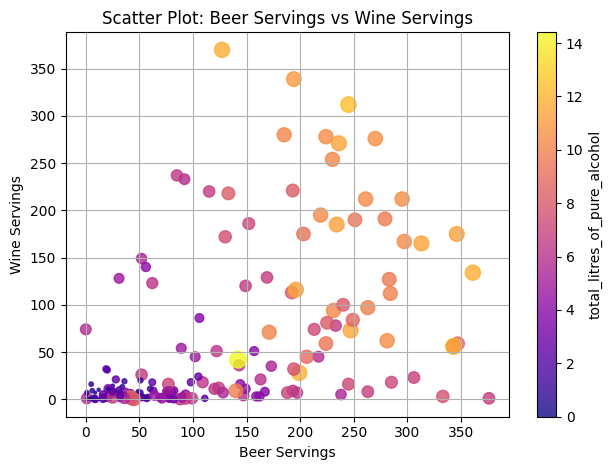

In [39]:
plt.figure(figsize=(10, 6))

scatter = df.plot.scatter(
    x='beer_servings', y='wine_servings',
    s=df['total_litres_of_pure_alcohol']*10,
    c='total_litres_of_pure_alcohol',
    colormap='plasma',
    alpha=0.8,
    colorbar=True)
plt.title('Scatter Plot: Beer Servings vs Wine Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Wine Servings')
plt.grid(True)
plt.tight_layout()

###  Bar Plot with Color Mapped to Continent

We'll create a bar plot where the color of each bar represents the continent using a colormap.

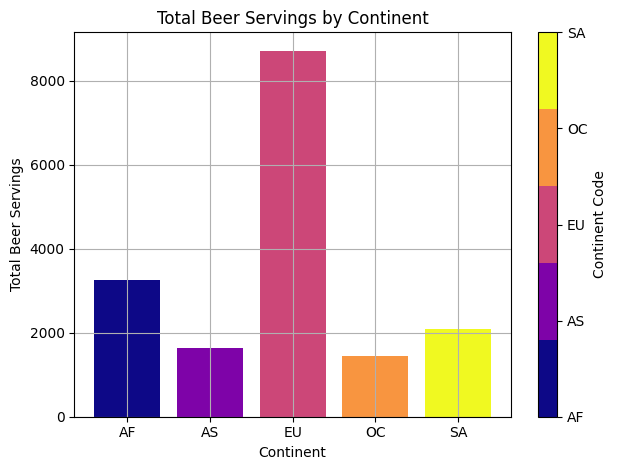

In [38]:
# Grouping by continent to calculate total beer servings
beer_per_continent = df.groupby('continent')['beer_servings'].sum()

# Create a figure and axis
fig, ax = plt.subplots()

# Define colormap
cmap = plt.get_cmap('plasma', len(beer_per_continent))  # retrieve colormap
colors = np.arange(len(beer_per_continent))

# Plotting the bar plot with colormap
bars = ax.bar(beer_per_continent.index, beer_per_continent.values, color=cmap.colors)

# Adding colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(beer_per_continent)-1))
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(len(beer_per_continent)), ax=ax)
cbar.set_label('Continent Code')
cbar.set_ticklabels(beer_per_continent.index)

# Customizing plot labels and appearance
ax.set_title('Total Beer Servings by Continent')
ax.set_xlabel('Continent')
ax.set_ylabel('Total Beer Servings')
ax.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Heatmap for Correlation Matrix

A heatmap is a great way to visualize a correlation matrix, where the color intensity represents the strength of correlation between different variables.

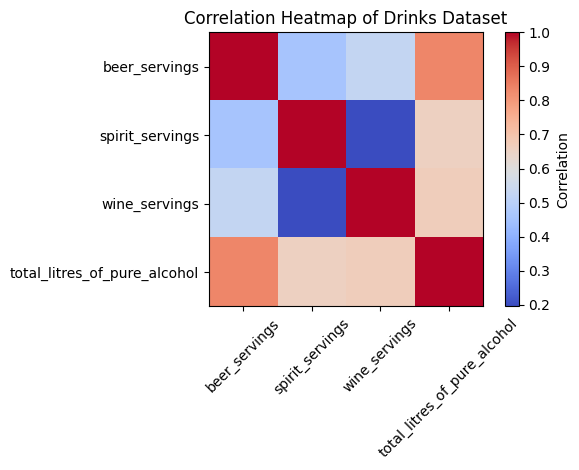

In [44]:
# Calculate correlation matrix
corr = df.corr(numeric_only=True)


# Define colormap
cmap = plt.get_cmap('coolwarm')


# Create a figure and axis
fig, ax = plt.subplots()

# Display the correlation matrix as an image
heatmap = ax.imshow(corr, cmap=cmap)

# Adding colorbar
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Correlation')

# Customizing plot labels and appearance
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45)
ax.set_yticklabels(corr.index)
ax.set_title('Correlation Heatmap of Drinks Dataset')
plt.tight_layout()
plt.show()


## Scatter matrix

A scatter matrix (or pair plot) is a grid of scatterplots where each variable is plotted against each other variable. This is useful for visualizing relationships between multiple variables in a dataset.

To be able to use functionalities like scatter_matrix from pandas.plotting, you need to install scipy (`pip install scipy`)

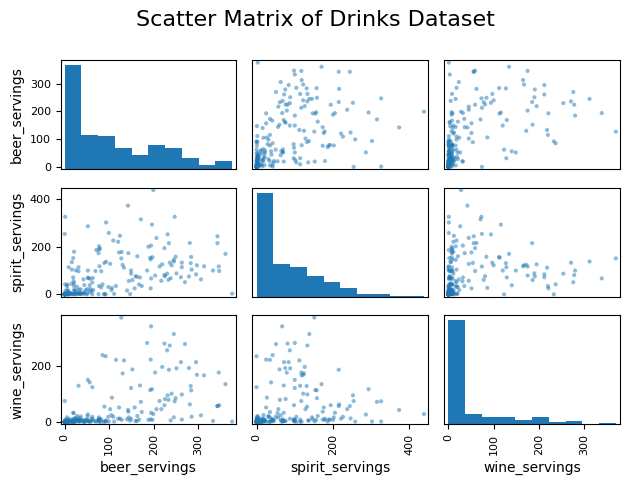

In [55]:
# Selecting subset of columns for scatter matrix
columns = ['beer_servings', 'spirit_servings', 'wine_servings']

# Create scatter matrix
pd.plotting.scatter_matrix(df[columns], diagonal='hist')

plt.suptitle('Scatter Matrix of Drinks Dataset', fontsize=16, y=1)
plt.tight_layout()

## Side by side bar plots 

Let's create a bar plot of average values of 'beer_servings', 'spirit_servings', and 'wine_servings' per continent

<Axes: xlabel='continent'>

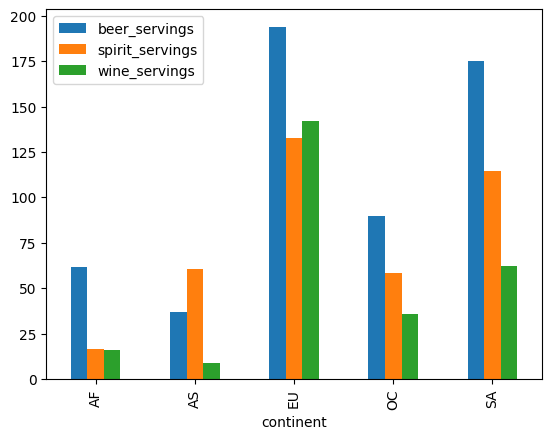

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the drinks dataset
url = 'https://raw.githubusercontent.com/geekcourses/JupyterNotebooksExamples/master/datasets/various/drinks.csv'
df = pd.read_csv(url)

# Calculate average values per continent and plot
continent_stats = df.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings']].mean()
continent_stats.plot(kind='bar')


## Box plots

Boxplots  are used to show the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

__Five-Number Summary__
* min = minimum value
* 25% = first quartile (Q1) = median of the lower half of the data
* 50% = second quartile (Q2) = median of the data
* 75% = third quartile (Q3) = median of the upper half of the data
* max = maximum value
  
* Interquartile Range (IQR) = Q3 - Q1

__Outliers__ 
* below Q1 - 1.5 * IQR
* above Q3 + 1.5 * IQR

### Plot multiple box plots side by side

Let's compare distribution of 'beer_servings', 'spirit_servings', 'wine_servings'.

By plotting multiple box plots side by side, we can:

1. compare the median and spread (IQR) of beer, spirit, and wine servings within the dataset.
2. identify any significant differences or similarities in the distribution of servings between different types of drinks.
3. quickly identify if the data distributions are skewed or if there are outliers (individual points beyond the whiskers) in any of the categories.

beer_servings         Axes(0.125,0.11;0.227941x0.77)
spirit_servings    Axes(0.398529,0.11;0.227941x0.77)
wine_servings      Axes(0.672059,0.11;0.227941x0.77)
dtype: object

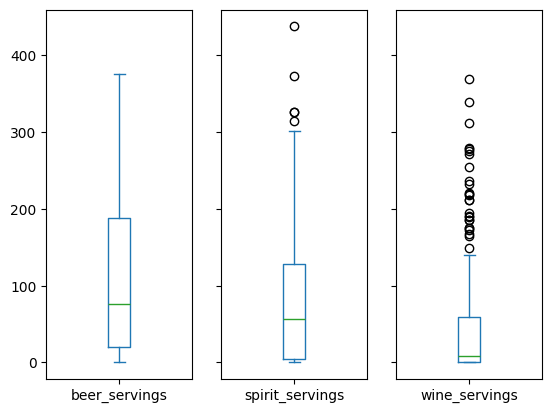

In [71]:
df[['beer_servings', 'spirit_servings', 'wine_servings']].plot(kind='box', subplots=True, layout=(1, 3), sharey=True)


*Overall Interpretation*

1. Beer Servings: The distribution of beer servings shows a relatively moderate spread with no extreme outliers, suggesting that beer consumption is more consistent across countries.
2. Spirit Servings: The distribution of spirit servings has a wider spread and several outliers, indicating variability and some countries with much higher consumption.
3. Wine Servings: The distribution of wine servings is tightly clustered with many outliers, suggesting that while most countries have low wine consumption, a few countries consume significantly more.

### Boxplot of beer survings group by continent


We can use the `df.boxplot()` method to create a box plot for 'beer_servings' grouped by 'continent', so a separate box plot is generated for each continent.

With this plot, we can:

1. easily compare how beer servings varies across different continents.
2. highlight any outliers in beer servings within each continent.
3. asses the median and spread of beer servings for each continent

<Axes: title={'center': 'beer_servings'}, xlabel='continent'>

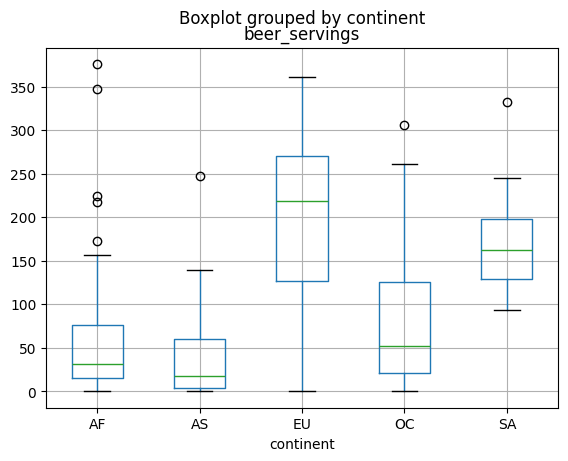

In [73]:
df.boxplot(column='beer_servings', by='continent')

## Plot Styles

Matplotlib provides a variaty of plotting styles that you can use to change the appearance of your plots. These styles include built-in styles that come with Matplotlib, and they help you quickly change the look and feel of your plots.

In [81]:
# list available plot style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 0, 'Beer Survings')

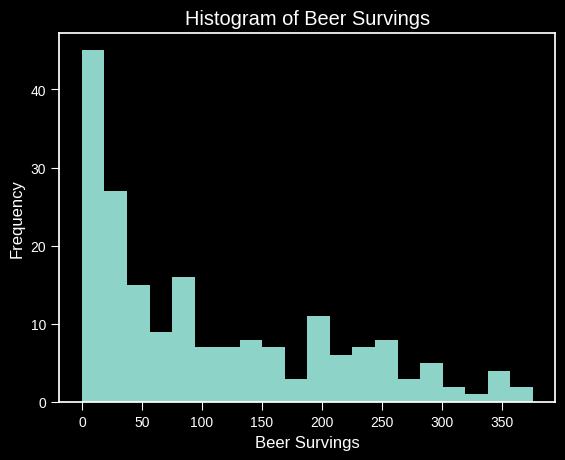

In [87]:
plt.style.use('dark_background')

df['beer_servings'].plot(kind='hist', bins=20, title="Histogram of Beer Survings")
plt.xlabel("Beer Survings")
